In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight 
from collections import Counter

In [3]:
url= 'creditcard.csv'
data = pd.read_csv(url) 

In [4]:
print(data.info())
print(data['Class'].value_counts()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
# Random Under Sampling
print("Original class distribution:", Counter(y_train))
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train) 
print("Original class distribution:", Counter(y_rus))

Original class distribution: Counter({0: 227451, 1: 394})
Original class distribution: Counter({0: 394, 1: 394})


In [20]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
print("Original class distribution:", Counter(y_train))
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train) 
print("Original class distribution:", Counter(y_ros))

Original class distribution: Counter({0: 227451, 1: 394})
Original class distribution: Counter({0: 227451, 1: 227451})


In [21]:
# SMOTE(Synthetic Minority Oversampling Techniqu)
print("Original class distribution:", Counter(y_train))
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("Original class distribution:", Counter(y_smote))

Original class distribution: Counter({0: 227451, 1: 394})
Original class distribution: Counter({0: 227451, 1: 227451})


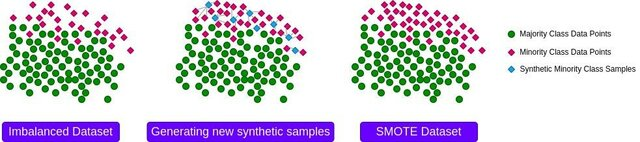


In [12]:
# Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 

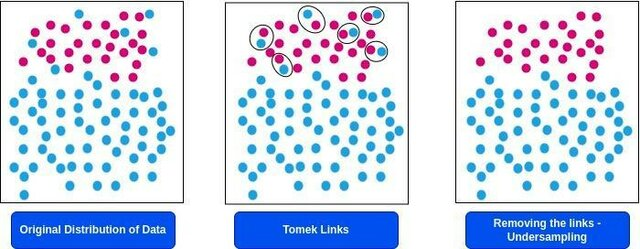

In [13]:
# Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights)) 
class_weights

array([  0.50086612, 289.14340102])

In [14]:
# Function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test, class_weights=None):
    model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob)) 

In [ ]:
# Evaluate each sampling technique
print("Random Undersampling:")
evaluate_model(X_rus, y_rus, X_test, y_test)

print("\nRandom Oversampling:")
evaluate_model(X_ros, y_ros, X_test, y_test)

print("\nSMOTE:")
evaluate_model(X_smote, y_smote, X_test, y_test)

#print("\nTomek Links:")
#evaluate_model(X_tl, y_tl, X_test, y_test)

print("\nClass Weights:")
evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict) 

In [ ]:
# finished 